# GitHub

## Git Commit and Push

In [5]:
%cd "/content/drive/My Drive/Projects/QAMP Spring 2023/qamp-spring-23"

/content/drive/My Drive/Projects/QAMP Spring 2023/qamp-spring-23


In [6]:
# Check status
!git status

On branch main
Your branch is up to date with 'origin/main'.

Changes not staged for commit:
  (use "git add/rm <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	deleted:    Data Reuploading Classifier(Entanglement_Layer_final).py
	deleted:    Dataset Benchmarking.ipynb
	deleted:    Dataset_Generation_sklearn_QAMP'23.ipynb
	deleted:    Development Notebook.ipynb
	deleted:    Entanglement_Layer(DRC).py
	deleted:    Usage Tutorial.ipynb
	modified:   data_reuploading.py

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	__init__.py
	__pycache__/
	sandbox/
	tutorial/

no changes added to commit (use "git add" and/or "git commit -a")


In [11]:
# Add/track changed files

# only modified files
#!git add -u

# all files
!git add .

In [12]:
# Commit the changes
# DON'T FORGET TO CHANGE THE COMMIT MESSAGE
safety_net = input('Have you changed the Commit Message? (Y/N)')
if safety_net == 'Y':
  !git commit -m "Clean up the repo, add Usage Tutorial Notebook." # commit message
  !git config --global user.email "eraraya.ricardo19@gmail.com"
  !git config --global user.name "ericardomuten"
else:
  print('Please change the Commit Message first.')

Have you changed the Commit Message? (Y/N)Y
[main 6bb75be] Clean up the repo, add Usage Tutorial Notebook.
 11 files changed, 3 insertions(+), 3 deletions(-)
 delete mode 100644 Development Notebook.ipynb
 delete mode 100644 Usage Tutorial.ipynb
 create mode 100644 __init__.py
 create mode 100644 __pycache__/data_reuploading.cpython-310.pyc
 rename Data Reuploading Classifier(Entanglement_Layer_final).py => sandbox/Data Reuploading Classifier(Entanglement_Layer_final).py (100%)
 rename Dataset Benchmarking.ipynb => sandbox/Dataset Benchmarking.ipynb (100%)
 rename Dataset_Generation_sklearn_QAMP'23.ipynb => sandbox/Dataset_Generation_sklearn_QAMP'23.ipynb (100%)
 create mode 100644 sandbox/Development Notebook.ipynb
 rename Entanglement_Layer(DRC).py => sandbox/Entanglement_Layer(DRC).py (100%)
 create mode 100644 tutorial/Usage Tutorial.ipynb


In [13]:
# Push changes to GitHub Repo
!git push

Enumerating objects: 12, done.
Counting objects: 100% (12/12), done.
Delta compression using up to 2 threads
Compressing objects: 100% (8/8), done.
Writing objects: 100% (10/10), 391.81 KiB | 6.32 MiB/s, done.
Total 10 (delta 1), reused 0 (delta 0)
remote: Resolving deltas: 100% (1/1), completed with 1 local object.
To https://github.com/ericardomuten/qamp-spring-23.git
   e8057b1..6bb75be  main -> main


In [14]:
# Check status
!git status

On branch main
Your branch is up to date with 'origin/main'.

nothing to commit, working tree clean


## Git Pull

In [ ]:
%cd "/content/drive/My Drive/Projects/QAMP Spring 2023/qamp-spring-23"

/content/drive/My Drive/Projects/QAMP Spring 2023/qamp-spring-23


In [34]:
!git pull

Already up to date.


In [35]:
# Check status
!git status

On branch main
Your branch is up to date with 'origin/main'.

nothing to commit, working tree clean


# QAMP Spring 2023

## Resources, Examples, References

- https://github.com/Qiskit/qiskit-machine-learning/blob/main/qiskit_machine_learning/neural_networks/two_layer_qnn.py
- https://qiskit.org/documentation/stubs/qiskit.circuit.library.RealAmplitudes.html
- https://qiskit.org/documentation/stubs/qiskit.circuit.library.TwoLocal.html
- https://github.com/Qiskit/qiskit-machine-learning/tree/main/qiskit_machine_learning/circuit/library
- https://qiskit.org/ecosystem/machine-learning/tutorials/index.html
  - https://qiskit.org/ecosystem/machine-learning/tutorials/01_neural_networks.html
  - https://qiskit.org/ecosystem/machine-learning/tutorials/02a_training_a_quantum_model_on_a_real_dataset.html
  - https://qiskit.org/ecosystem/machine-learning/tutorials/05_torch_connector.html
- https://scikit-learn.org/stable/datasets/sample_generators.html
- https://quantum-journal.org/papers/q-2020-02-06-226/pdf/ (original paper)

## List of Requirements (following the original paper)

### Ansatz
- Single qubit: \\
  Rotational Gate layers ($L$) only.

$$
\mathcal{U} = L(N)L(N-1) \ldots L(2)L(1) \\
\text{where:} \\
L(i) = U(\vec\theta_i^{(k)} + \vec w_i^{(k)} \cdot \vec x^{(k)} ) \ U(\vec\theta_i^{(k-1)} + \vec w_i^{(k-1)} \cdot \vec x^{(k-1)} ) \ldots \ U(\vec\theta_i^{(1)} + \vec w_i^{(1)} \cdot \vec x^{(1)} ) \\
\text{Each k vector is 3 dimmensional.} \\
U(\vec\theta) = Rx(\theta_x)Ry(\theta_y)Rz(\theta_z) \\
\vec\theta = (\theta_x, \theta_y, \theta_z) \\
\vec w = (w_x, w_y, w_z) \\
\vec x = \text{input data} \\
N = \text{number of layers}
$$

- Multi qubits without entanglement \\
  Stacking the same ansatz $\mathcal{U}$ for multiple qubits.

- Multi qubits with entanglement (CZ gates) \\
  Alternating between $L$ and entanglement layer $E$. \\
  **For 3 qubits or more? -> Linear entanglement**

$$
\mathcal{U} = L(N)\ E\ L(N-1)\ E \ldots E\ L(2)\ E\ L(1)
$$

### Classification & Measurement Strategy, Cost Function
**Use the one-hot encoding (computational states).**

- Single qubit ansatz
  - **Maximally orthogonal states (single qubit measurement)**:
      The correct states are the C maximally orthogonal states where C is the number of classes. Measure the fidelity between the output single qubit state vs the correct maximally orthogonal state. For example, for 4 classes, use the maximally orthogonal states formed by a tetrahedron inside a Bloch sphere.

$$
\chi^2(\vec{\alpha}, \vec{\theta}, \vec{w})=\frac{1}{2} \sum_{\mu=1}^M\left(\sum_{c=1}^{\mathcal{C}}\left(F_c\left(\vec{\theta}, \vec{w}, \vec{x}_\mu\right)-Y_c\left(\vec{x}_\mu\right)\right)^2\right)
$$

- Multi qubits ansatz
  - **Maximally orthogonal states (single qubit measurement)**: similar with the single qubit ansatz, but since we have multiple qubits now, we need to fix (choose) which one of the qubits we want to use for the measurement.
$$
\chi^2(\vec{\alpha}, \vec{\theta}, \vec{w})=\frac{1}{2} \sum_{\mu=1}^M\left(\sum_{c=1}^{\mathcal{C}}\left(F_c\left(\vec{\theta}, \vec{w}, \vec{x}_\mu\right)-Y_c\left(\vec{x}_\mu\right)\right)^2\right)
$$
  - **Maximally orthogonal states (average of multi single qubit measurement)**: similar like above, but instead of choosing 1 qubit, we do a single qubit measurement for all qubits and average the results.
$$
\chi^2(\vec{\alpha}, \vec{\theta}, \vec{w})= \frac{1}{2} \sum_{\mu=1}^M \sum_{c=1}^{\mathcal{C}}\left(\sum_{q=1}^Q\left(F_{c, q}\left(\vec{\theta}, \vec{w}, \vec{x}_\mu\right)-Y_c\left(\vec{x}_\mu\right)\right)^2\right)
$$
  - **Computational states (multi qubits measurement)**:
      The correct states are the computational states constructed from log2(C) qubits where C is the number of classes. Measure the fidelity between the output multi qubits state vs the correct computational state. For example, for 4 classes, the correct computational states for each classes are 00, 01, 10, and 11.

$$
\chi^2(\vec{\alpha}, \vec{\theta}, \vec{w})= \frac{1}{2} \sum_{\mu=1}^M \left(\sum_{q=1}^Q\left(F_{q}\left(\vec{\theta}, \vec{w}, \vec{x}_\mu\right)-Y_c\left(\vec{x}_\mu\right)\right)^2\right)
$$

### Fidelity Function $F$
**For now, just use the regular fidelity function.**

$$
|\psi(\vec{\theta}, \vec{w}, \vec{x})\rangle = \mathcal{U} |0\rangle \text{, the output state.}
$$

- (Regular) Fidelity

$$
F_c(\vec{\theta}, \vec{w}, \vec{x})=\left|\left\langle\tilde{\psi}_c \mid \psi(\vec{\theta}, \vec{w}, \vec{x})\right\rangle\right|^2
$$

- Weighted Fidelity

$$
F_c(\vec{\theta}, \vec{w}, \vec{x})=\alpha_c\left|\left\langle\tilde{\psi}_c \mid \psi(\vec{\theta}, \vec{w}, \vec{x})\right\rangle\right|^2 \\
\text{The $\alpha_c$ is from $\vec \alpha = (\alpha_1, \alpha_2, \ldots, \alpha_C)$, which is another trainable parameters vector.}
$$

### Training/Optimization
How do we want to train the circuit? With TensorFlow? SciPy? PyTorch? \\
Integration with QNN implementation of Qiskit Machine Learning (EstimatorQNN and SamplerQNN)? -> **Use PyTorch with TorchConnector feature of Qiskit.**

### Examples

- Example of training the ansatz with Iris Dataset.
  - Ansatz with single qubit
    - Binary classification (2 classes)
    - Multi class classification (3 classes)
  - Ansatz with multi qubits
    - Binary classification (2 classes)
    - Multi class classification (3 classes)

## Code Structure

In [1]:
from IPython.display import clear_output
!pip install qiskit
!pip install qiskit_machine_learning
!pip install pylatexenc
clear_output()

In [2]:
from qiskit.circuit import QuantumCircuit, ParameterVector
from qiskit.utils import algorithm_globals
from qiskit.circuit import Parameter
from qiskit.circuit.library import RealAmplitudes, ZZFeatureMap, TwoLocal
from qiskit_machine_learning.neural_networks import SamplerQNN, EstimatorQNN
from qiskit_machine_learning.connectors import TorchConnector

import numpy as np
import matplotlib.pyplot as plt

from torch import Tensor
from torch.nn import Linear, CrossEntropyLoss, MSELoss
from torch.optim import LBFGS

In [3]:
from qiskit.circuit.library import RealAmplitudes, ZZFeatureMap, TwoLocal, NLocal

ansatz = RealAmplitudes(3)
ansatz.parameters

ParameterView([ParameterVectorElement(θ[0]), ParameterVectorElement(θ[1]), ParameterVectorElement(θ[2]), ParameterVectorElement(θ[3]), ParameterVectorElement(θ[4]), ParameterVectorElement(θ[5]), ParameterVectorElement(θ[6]), ParameterVectorElement(θ[7]), ParameterVectorElement(θ[8]), ParameterVectorElement(θ[9]), ParameterVectorElement(θ[10]), ParameterVectorElement(θ[11])])

In [5]:
from qiskit.utils import get_entangler_map

# only supports 'full', 'linear' or 'sca' type
get_entangler_map('full', 3)

[[0, 1], [0, 2], [1, 2]]

In [7]:
entangling_layer = TwoLocal(num_qubits=5, entanglement='pairwise', entanglement_blocks='cx', reps=1).decompose()
entangling_layer.draw()

q_0: ──■───────
     ┌─┴─┐     
q_1: ┤ X ├──■──
     └───┘┌─┴─┐
q_2: ──■──┤ X ├
     ┌─┴─┐└───┘
q_3: ┤ X ├──■──
     └───┘┌─┴─┐
q_4: ─────┤ X ├
          └───┘

In [16]:
qc = QuantumCircuit(5)
qc.compose(entangling_layer, inplace=True)
qc.draw()

q_0: ──■───────
     ┌─┴─┐     
q_1: ┤ X ├──■──
     └───┘┌─┴─┐
q_2: ──■──┤ X ├
     ┌─┴─┐└───┘
q_3: ┤ X ├──■──
     └───┘┌─┴─┐
q_4: ─────┤ X ├
          └───┘

In [10]:
from qiskit.circuit import QuantumCircuit, ParameterVector
from qiskit.circuit.library import TwoLocal

import numpy as np
from typing import Optional


class DataReuploading():
    """
    Create the Data Reuploading Classifier ansatz.
    Based on the works of Perez-Salinas, et al.
      https://quantum-journal.org/papers/q-2020-02-06-226/pdf/
    """

    def __init__(
        self,
        num_qubits: int,
        num_features: int,
        num_layers: int,
        entanglement_blocks: Optional[
            Union[str, List[str], type, List[type], QuantumCircuit, List[QuantumCircuit]]
        ] = 'cz',
        entanglement: Union[str, List[List[int]], Callable[[int], List[int]]] = "linear",
        skip_final_entangling_layer: bool = True,
        insert_barriers: bool = False,
    ):
        """
        Args:
            num_qubits: The number of qubits.
            num_features: The number of input features (the dimension of the input data).
            num_layers: The number of layers (N).
            entanglement_blocks: The gates used in the entanglement layer. See the TwoLocal documentation
                https://qiskit.org/documentation/stubs/qiskit.circuit.library.TwoLocal.html. Defaults to ``cz``.
            entanglement: Specifies the entanglement structure. See the TwoLocal documentation
                https://qiskit.org/documentation/stubs/qiskit.circuit.library.TwoLocal.html. Defaults to ``linear``.
            skip_final_entangling_layer: If ``True``, the final layer will end with only rotational gate (no entangling layer). If ``False``,
                the final layer will end with entangling layer following the last rotational gate layer. Defaults to ``True``.
            insert_barriers: If ``True``, barriers are inserted in between each layer. If ``False``,
                no barriers are inserted. Defaults to ``False``.
        Returns:
            ansatz: A QuantumCircuit object.
        """

        self._num_qubits = num_qubits
        # rounding up the number of features to the nearest integer number that is multiples of 3
        self._num_features = int(np.ceil(num_features/3)*3)
        self._num_layers = num_layers

        self.parameters = ParameterVector(name="θ", length=2*self._num_qubits*self._num_features*self._num_layers)
        self.input_params = ParameterVector(name="x", length=self._num_features)

        qc = QuantumCircuit(self._num_qubits)

        for l in range(self._num_layers):
          for k in range(int(np.ceil(num_features/3))):
            for q in range(self._num_qubits):
              qc.compose(self.rotational_gate_layer(self._num_qubits, q,
                                                    self.parameters[l*self._num_qubits*int(np.ceil(num_features/3))*2*3 + q*int(np.ceil(num_features/3))*2*3 + k*2*3
                                                                    :l*self._num_qubits*int(np.ceil(num_features/3))*2*3 + q*int(np.ceil(num_features/3))*2*3 + k*2*3 + 2*3],
                                                    self.input_params[k*3 : k*3+3]), inplace=True)

          if insert_barriers:
            qc.barrier()

          # if it's not the last layer, add the entangling layer
          if (l+1) != self._num_layers and self._num_qubits != 1:
            qc.compose(self.entanglement_layer(self._num_qubits, entanglement_blocks=entanglement_blocks, entanglement=entanglement), inplace=True)
            if insert_barriers:
              qc.barrier()

          # add entangling layer on the last layer if set by the user
          if skip_final_entangling_layer == False and (l+1) == self._num_layers and self._num_qubits != 1:
            qc.compose(self.entanglement_layer(self._num_qubits, entanglement_blocks=entanglement_blocks, entanglement=entanglement), inplace=True)
            if insert_barriers:
              qc.barrier()


        self.circuit = qc

    def rotational_gate_layer(
        self,
        num_qubits: int,
        qubit_id: int,
        trainable_params : ParameterVector,
        input_params : ParameterVector,
    ):
        """
          This is the rotational gate layer.
          Args:
              num_qubits: The number of qubits.
              num_features: The number of input features (the dimension of the input data).
          Returns:
              circuit_block: A QuantumCircuit object with ParameterVector as gate's arguments.
        """

        circuit_block = QuantumCircuit(num_qubits)
        circuit_block.rx(trainable_params[0] + trainable_params[3]*input_params[0], qubit_id)
        circuit_block.ry(trainable_params[1] + trainable_params[4]*input_params[1], qubit_id)
        circuit_block.rz(trainable_params[2] + trainable_params[5]*input_params[2], qubit_id)

        return circuit_block



    def entanglement_layer(
        self,
        num_qubits: int,
        entanglement_blocks: Optional[
            Union[str, List[str], type, List[type], QuantumCircuit, List[QuantumCircuit]]
        ] = None,
        entanglement: Union[str, List[List[int]], Callable[[int], List[int]]] = "full",
    ):
        """
          This is the entangling layer.
          Args:
              num_qubits: The number of qubits.
          Returns:
              circuit_block: A QuantumCircuit object consists of entangling gates.
        """

        circuit_block = QuantumCircuit(num_qubits)

        # Build the engangling layer
        entangling_layer = TwoLocal(num_qubits=num_qubits, entanglement_blocks=entanglement_blocks, entanglement=entanglement, reps=1).decompose()
        circuit_block.compose(entangling_layer, inplace=True)

        return circuit_block


    @property
    def num_qubits(self) -> int:
        """Returns the number of qubits used by the ansatz."""
        return self._num_qubits

    @property
    def num_features(self) -> int:
        """Returns the number of features of the input data accepted by the ansatz."""
        return self._num_features

    @property
    def num_layers(self) -> int:
        """Returns the number of layers used by the ansatz."""
        return self._num_layers

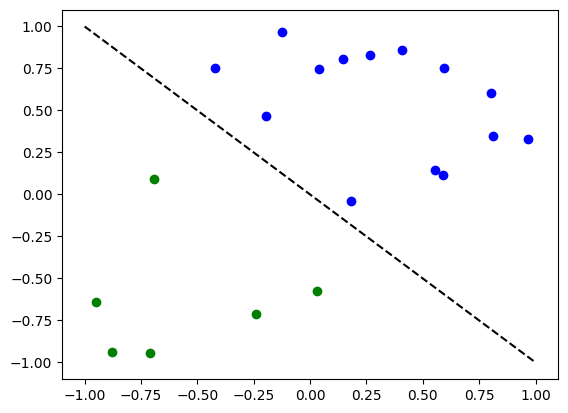

In [ ]:
# Generate random dataset

# Select dataset dimension (num_inputs) and size (num_samples)
num_inputs = 2
num_samples = 20

# Generate random input coordinates (X) and binary labels (y)
X = 2 * algorithm_globals.random.random([num_samples, num_inputs]) - 1
y01 = 1 * (np.sum(X, axis=1) >= 0)  # in { 0,  1}, y01 will be used for SamplerQNN example
y = 2 * y01 - 1  # in {-1, +1}, y will be used for EstimatorQNN example

# Padding the dataset so that the number of features is in multiple of 3
X = np.pad(X, ((0, 0), (0, 1)))

# Convert to torch Tensors
X_ = Tensor(X)
y01_ = Tensor(y01).reshape(len(y)).long()
y_ = Tensor(y).reshape(len(y), 1)

# Plot dataset
for x, y_target in zip(X, y):
    if y_target == 1:
        plt.plot(x[0], x[1], "bo")
    else:
        plt.plot(x[0], x[1], "go")
plt.plot([-1, 1], [1, -1], "--", color="black")
plt.show()

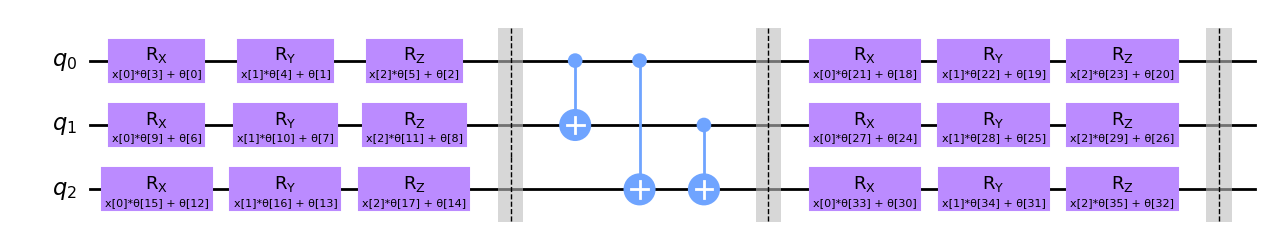

In [17]:
DRC = DataReuploading(num_qubits=3, num_features=3, num_layers=2, insert_barriers=True, entanglement='full', entanglement_blocks='cx')
DRC.circuit.draw('mpl')

In [ ]:
DRC.parameters

ParameterVector(name=θ, length=72)

In [ ]:
from typing import Union, Optional, List, Callable, Any

class DataReuploading_new(TwoLocal):

    def __init__(
        self,
        num_qubits: int | None = None,
        num_features: int | None = None,
        num_layers: int | None = None,
        entanglement_blocks: Optional[
            Union[str, List[str], type, List[type], QuantumCircuit, List[QuantumCircuit]]
        ] = None,
        entanglement: Union[str, List[List[int]], Callable[[int], List[int]]] = "full",
        skip_final_rotation_layer: bool = False,
        insert_barriers: bool = False,
        initial_state: Optional[Any] = None,
        name: str = "DataReuploading",
    ):

      self.num_features = int(3*np.ceil(num_features/3))
      building_block = ['rx', 'ry', 'rz']
      rotation_blocks = []
      for i in range(int(self.num_features/3)):
        rotation_blocks += building_block

      super().__init__(
            num_qubits=num_qubits,
            rotation_blocks=rotation_blocks,
            entanglement_blocks=entanglement_blocks,
            entanglement=entanglement,
            reps=num_layers-1,
            skip_final_rotation_layer=skip_final_rotation_layer,
            insert_barriers=insert_barriers,
            initial_state=initial_state,
            name=name,
        )


      w = ParameterVector(name="w", length=num_qubits*self.num_features*num_layers)
      b = ParameterVector(name="b", length=num_qubits*self.num_features*num_layers)
      input_params = ParameterVector(name="x", length=self.num_features)



      for instruction, qargs, cargs in self.data:
          instruction.params = [w[0]*x[0] + b[0]]
          #print(instruction.params)
      #instruction, _, _ = self.data


In [ ]:
drc_new = DataReuploading_new(3, 4, 2, entanglement_blocks='cz', entanglement='linear', insert_barriers=True)

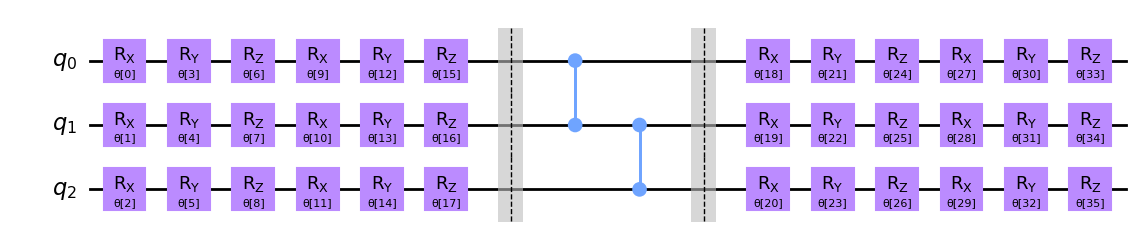

In [ ]:
drc_new.decompose().draw('mpl')

In [ ]:
test = ParameterVector(name="test", length=num_qubits*num_features)
for instruction, qargs, cargs in drc_new.data:
  instruction.params = [test[0]]

drc_new.parameters

ParameterView([ParameterVectorElement(θ[0]), ParameterVectorElement(θ[1]), ParameterVectorElement(θ[2]), ParameterVectorElement(θ[3]), ParameterVectorElement(θ[4]), ParameterVectorElement(θ[5]), ParameterVectorElement(θ[6]), ParameterVectorElement(θ[7]), ParameterVectorElement(θ[8]), ParameterVectorElement(θ[9]), ParameterVectorElement(θ[10]), ParameterVectorElement(θ[11]), ParameterVectorElement(θ[12]), ParameterVectorElement(θ[13]), ParameterVectorElement(θ[14]), ParameterVectorElement(θ[15]), ParameterVectorElement(θ[16]), ParameterVectorElement(θ[17]), ParameterVectorElement(θ[18]), ParameterVectorElement(θ[19]), ParameterVectorElement(θ[20]), ParameterVectorElement(θ[21]), ParameterVectorElement(θ[22]), ParameterVectorElement(θ[23]), ParameterVectorElement(θ[24]), ParameterVectorElement(θ[25]), ParameterVectorElement(θ[26]), ParameterVectorElement(θ[27]), ParameterVectorElement(θ[28]), ParameterVectorElement(θ[29]), ParameterVectorElement(θ[30]), ParameterVectorElement(θ[31]), Par

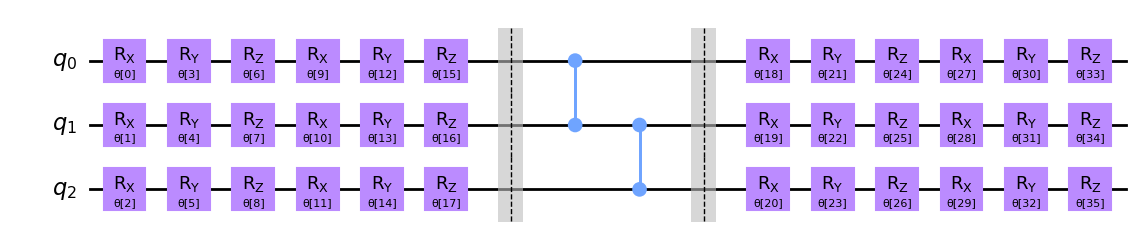

In [ ]:
drc_new.decompose().draw('mpl')

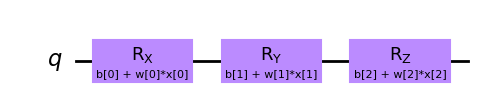

In [ ]:
def datareuploading_rotation_blocks(num_qubits, num_features):

  w = ParameterVector(name="w", length=num_qubits*num_features)
  b = ParameterVector(name="b", length=num_qubits*num_features)
  input_params = ParameterVector(name="x", length=num_features)

  qc = QuantumCircuit(num_qubits)

  for q in range(num_qubits):
    for i in range(int(num_features/3)):
      qc.rx(w[q*num_features + i*3 + 0]*input_params[i*3 + 0] + b[q*num_features + i*3 + 0], q)
      qc.ry(w[q*num_features + i*3 + 1]*input_params[i*3 + 1] + b[q*num_features + i*3 + 1], q)
      qc.rz(w[q*num_features + i*3 + 2]*input_params[i*3 + 2] + b[q*num_features + i*3 + 2], q)

  return qc, w, b, input_params

num_qubits = 1
num_features = 3
num_features = int(3*np.ceil(num_features/3))
qc, w, b, input_params = datareuploading_rotation_blocks(num_qubits, num_features)
params = [w[i] for i in range(len(w))] + [b[i] for i in range(len(b))]
qc.draw('mpl')

In [ ]:
test = ParameterVector(name="test", length=num_qubits*num_features)
for instruction, qargs, cargs in qc.data:
  instruction.params = [test[0]]

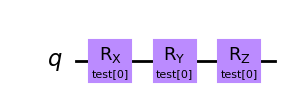

In [ ]:
qc.draw('mpl')

In [ ]:
# Setup QNN
qnn1 = EstimatorQNN(
    circuit=qc, input_params=input_params, weight_params=params
)

# Set up PyTorch module
model1 = TorchConnector(qnn1)

In [ ]:
# Test with a single input
model1(X_[0, :])

tensor([0.6311], grad_fn=<_TorchNNFunctionBackward>)

In [ ]:
# Define optimizer and loss
optimizer = LBFGS(model1.parameters())
f_loss = MSELoss(reduction="sum")

# Start training
model1.train()  # set model to training mode


# Note from (https://pytorch.org/docs/stable/optim.html):
# Some optimization algorithms such as LBFGS need to
# reevaluate the function multiple times, so you have to
# pass in a closure that allows them to recompute your model.
# The closure should clear the gradients, compute the loss,
# and return it.
def closure():
    optimizer.zero_grad()  # Initialize/clear gradients
    loss = f_loss(model1(X_), y_)  # Evaluate loss function
    loss.backward()  # Backward pass
    print(loss.item())  # Print loss
    return loss


# Run optimizer step4
optimizer.step(closure)

16.757596969604492
11.883544921875
24.123594284057617
8.151537895202637
7.9702301025390625
7.417575836181641
6.626438140869141
8.848688125610352
6.495917797088623
6.461437225341797
6.444430828094482
6.442026138305664
6.440406799316406
6.440404891967773
6.440403938293457


tensor(16.7576, grad_fn=<MseLossBackward0>)

In [ ]:
test = ParameterVector(name="test", length=num_qubits*num_features)
for instruction, qargs, cargs in qc.data:
  print(instruction.params)

[ParameterExpression(b[0] + w[0]*x[0])]
[ParameterExpression(b[1] + w[1]*x[1])]
[ParameterExpression(b[2] + w[2]*x[2])]
[ParameterExpression(b[3] + w[3]*x[3])]
[ParameterExpression(b[4] + w[4]*x[4])]
[ParameterExpression(b[5] + w[5]*x[5])]
[ParameterExpression(b[6] + w[6]*x[0])]
[ParameterExpression(b[7] + w[7]*x[1])]
[ParameterExpression(b[8] + w[8]*x[2])]
[ParameterExpression(b[9] + w[9]*x[3])]
[ParameterExpression(b[10] + w[10]*x[4])]
[ParameterExpression(b[11] + w[11]*x[5])]


In [ ]:
[test[0]]

[ParameterVectorElement(test[0])]

In [ ]:
instruction, _, _ = qc.data[0]

In [ ]:
instruction.params = [test[0]]

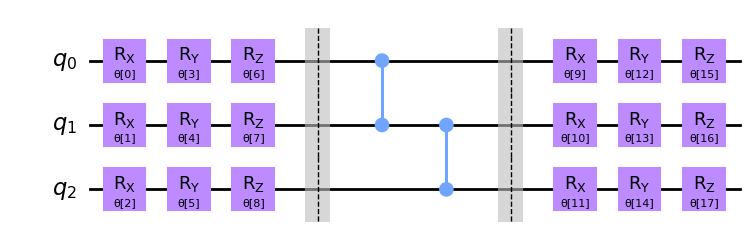

In [ ]:
num_layers = 2
two_local_circuit = TwoLocal(3, ['rx', 'ry', 'rz'], 'cz', 'linear', reps=num_layers-1, insert_barriers=True)
two_local_circuit.decompose().draw('mpl')

In [ ]:
test = ParameterVector(name="test", length=num_qubits*num_features)
for instruction, qargs, cargs in two_local_circuit.data:
  instruction.params = [test[0]]

NameError: ignored

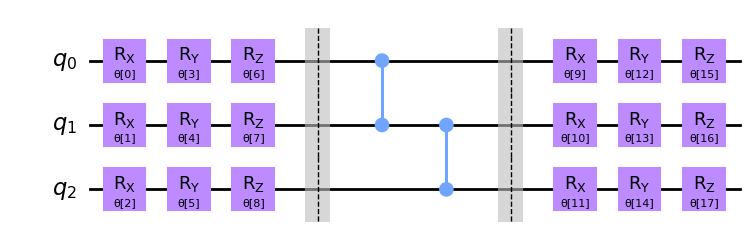

In [ ]:
two_local_circuit.decompose().draw('mpl')

In [ ]:
i = 0
for instruction, qargs, cargs in qc.data:
  if i == 0:
    print(instruction.params)
  i += 1

two_local_circuit.parameters

[]


ParameterView([ParameterVectorElement(θ[0]), ParameterVectorElement(θ[1]), ParameterVectorElement(θ[2]), ParameterVectorElement(θ[3]), ParameterVectorElement(θ[4]), ParameterVectorElement(θ[5]), ParameterVectorElement(θ[6]), ParameterVectorElement(θ[7]), ParameterVectorElement(θ[8]), ParameterVectorElement(θ[9]), ParameterVectorElement(θ[10]), ParameterVectorElement(θ[11]), ParameterVectorElement(θ[12]), ParameterVectorElement(θ[13]), ParameterVectorElement(θ[14]), ParameterVectorElement(θ[15]), ParameterVectorElement(θ[16]), ParameterVectorElement(θ[17]), ParameterVectorElement(θ[18]), ParameterVectorElement(θ[19]), ParameterVectorElement(θ[20]), ParameterVectorElement(θ[21]), ParameterVectorElement(θ[22]), ParameterVectorElement(θ[23]), ParameterVectorElement(θ[24]), ParameterVectorElement(θ[25]), ParameterVectorElement(θ[26]), ParameterVectorElement(θ[27]), ParameterVectorElement(θ[28]), ParameterVectorElement(θ[29]), ParameterVectorElement(θ[30]), ParameterVectorElement(θ[31]), Par

In [ ]:
b_id = []
for i in range(num_layers):
  b_id += [(id + i*2*num_qubits*) for id in range(num_features*num_qubits)]
b_id

[3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14]

In [ ]:
[] + [1,2]

[1, 2]

In [ ]:
[two_local_circuit.parameters[i] for i in range(10)]

[ParameterVectorElement(θ[0]),
 ParameterVectorElement(θ[1]),
 ParameterVectorElement(θ[2]),
 ParameterVectorElement(θ[3]),
 ParameterVectorElement(θ[4]),
 ParameterVectorElement(θ[5]),
 ParameterVectorElement(θ[6]),
 ParameterVectorElement(θ[7]),
 ParameterVectorElement(θ[8]),
 ParameterVectorElement(θ[9])]

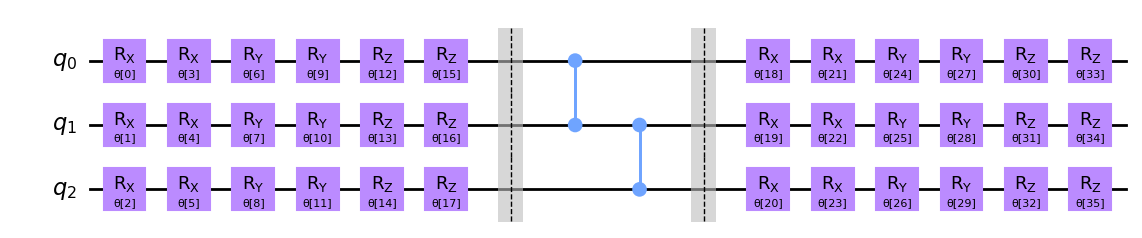

In [ ]:
two_local_circuit = TwoLocal(3, ['rx', 'rx', 'ry', 'ry', 'rz', 'rz'], 'cz', 'linear', reps=1, insert_barriers=True)
two_local_circuit.decompose().draw('mpl')

In [ ]:
isinstance(two_local_circuit, QuantumCircuit)

True

In [ ]:
two_local_circuit.parameters

ParameterView([ParameterVectorElement(θ[0]), ParameterVectorElement(θ[1]), ParameterVectorElement(θ[2]), ParameterVectorElement(θ[3]), ParameterVectorElement(θ[4]), ParameterVectorElement(θ[5]), ParameterVectorElement(θ[6]), ParameterVectorElement(θ[7]), ParameterVectorElement(θ[8]), ParameterVectorElement(θ[9]), ParameterVectorElement(θ[10]), ParameterVectorElement(θ[11]), ParameterVectorElement(θ[12]), ParameterVectorElement(θ[13]), ParameterVectorElement(θ[14]), ParameterVectorElement(θ[15]), ParameterVectorElement(θ[16]), ParameterVectorElement(θ[17]), ParameterVectorElement(θ[18]), ParameterVectorElement(θ[19]), ParameterVectorElement(θ[20]), ParameterVectorElement(θ[21]), ParameterVectorElement(θ[22]), ParameterVectorElement(θ[23]), ParameterVectorElement(θ[24]), ParameterVectorElement(θ[25]), ParameterVectorElement(θ[26]), ParameterVectorElement(θ[27]), ParameterVectorElement(θ[28]), ParameterVectorElement(θ[29]), ParameterVectorElement(θ[30]), ParameterVectorElement(θ[31]), Par

In [ ]:
# Setup QNN
qnn1 = EstimatorQNN(
    circuit=DRC.circuit, input_params=DRC.input_params, weight_params=DRC.parameters
)

# Set up PyTorch module
model1 = TorchConnector(qnn1)

In [ ]:
# Test with a single input
model1(X_[0, :])

tensor([0.5902], grad_fn=<_TorchNNFunctionBackward>)

In [ ]:
# Define optimizer and loss
optimizer = LBFGS(model1.parameters())
f_loss = MSELoss(reduction="sum")

# Start training
model1.train()  # set model to training mode


# Note from (https://pytorch.org/docs/stable/optim.html):
# Some optimization algorithms such as LBFGS need to
# reevaluate the function multiple times, so you have to
# pass in a closure that allows them to recompute your model.
# The closure should clear the gradients, compute the loss,
# and return it.
def closure():
    optimizer.zero_grad()  # Initialize/clear gradients
    loss = f_loss(model1(X_), y_)  # Evaluate loss function
    loss.backward()  # Backward pass
    print(loss.item())  # Print loss
    return loss


# Run optimizer step4
optimizer.step(closure)

30.925395965576172
16.872392654418945
9.657137870788574
6.9095458984375
5.144740581512451
4.569372653961182
3.1289594173431396
2.9337987899780273
2.863201141357422
2.8070716857910156
2.739845037460327
2.6622402667999268
2.549417734146118
2.475526809692383
2.3887927532196045
2.2856571674346924
2.19757342338562
2.117572546005249
2.063673734664917
2.0551764965057373


tensor(30.9254, grad_fn=<MseLossBackward0>)

Accuracy: 1.0


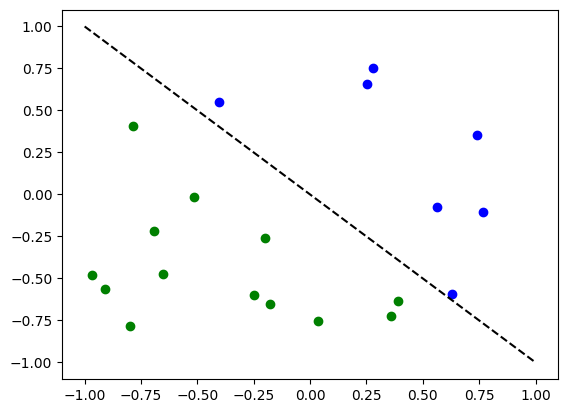

In [ ]:
# Evaluate model and compute accuracy
y_predict = []
for x, y_target in zip(X, y):
    output = model1(Tensor(x))
    y_predict += [np.sign(output.detach().numpy())[0]]

print("Accuracy:", sum(y_predict == y) / len(y))

# Plot results
# red == wrongly classified
for x, y_target, y_p in zip(X, y, y_predict):
    if y_target == 1:
        plt.plot(x[0], x[1], "bo")
    else:
        plt.plot(x[0], x[1], "go")
    if y_target != y_p:
        plt.scatter(x[0], x[1], s=200, facecolors="none", edgecolors="r", linewidths=2)
plt.plot([-1, 1], [1, -1], "--", color="black")
plt.show()

## Data Generator

Taken from https://github.com/AdrianPerezSalinas/universal_qlassifier/blob/master/data_gen.py (the code base of the original paper)


In [ ]:
import numpy as np

problems = ['circle', '3 circles', 'wavy circle', 'hypersphere', 'tricrown', 'non convex', 'crown', 'sphere', 'squares', 'wavy lines']

def data_generator(problem, samples=None):
    """
    This function generates the data for a problem
    INPUT:
        -problem: Name of the problem, one of: 'circle', '3 circles', 'hypersphere', 'tricrown', 'non convex', 'crown', 'sphere', 'squares', 'wavy lines'
        -samples Number of samples for the data
    OUTPUT:
        -data: set of training and test data
        -settings: things needed for drawing
    """
    problem = problem.lower()
    if problem not in problems:
        raise ValueError('problem must be one of {}'.format(problems))
    if samples == None:
        if problem == 'sphere':
            samples = 4500
        elif problem == 'hypersphere':
            samples = 5000
        else:
            samples = 4200

    if problem == 'circle':
        data, settings = _circle(samples)

    if problem == '3 circles':
        data, settings = _3_circles(samples)

    if problem == 'wavy lines':
        data, settings = _wavy_lines(samples)

    if problem == 'squares':
        data, settings = _squares(samples)

    if problem == 'sphere':
        data, settings = _sphere(samples)

    if problem == 'non convex':
        data, settings = _non_convex(samples)

    if problem == 'crown':
        data, settings = _crown(samples)

    if problem == 'tricrown':
        data, settings = _tricrown(samples)

    if problem == 'hypersphere':
        data, settings = _hypersphere(samples)


    return data, settings

def _circle(samples):
    centers = np.array([[0, 0]])
    radii = np.array([np.sqrt(2/np.pi)])
    data=[]
    dim = 2
    for i in range(samples):
        x = 2 * (np.random.rand(dim)) - 1
        y = 0
        for c, r in zip(centers, radii):
            if np.linalg.norm(x - c) < r:
                y = 1

        data.append([x, y])

    return data, (centers, radii)

def _3_circles(samples):
    centers = np.array([[-1, 1], [1, 0], [-.5, -.5]])
    radii = np.array([1, np.sqrt(6/np.pi - 1), 1/2])
    data=[]
    dim = 2
    for i in range(samples):
        x = 2 * (np.random.rand(dim)) - 1
        y = 0
        for j, (c, r) in enumerate(zip(centers, radii)):
            if np.linalg.norm(x - c) < r:
                y = j + 1

        data.append([x, y])


    return data, (centers, radii)


def _wavy_lines(samples, freq = 1):
    def fun1(s):
        return s + np.sin(freq * np.pi * s)

    def fun2(s):
        return -s + np.sin(freq * np.pi * s)
    data=[]
    dim=2
    for i in range(samples):
        x = 2 * (np.random.rand(dim)) - 1
        if x[1] < fun1(x[0]) and x[1] < fun2(x[0]): y = 0
        if x[1] < fun1(x[0]) and x[1] > fun2(x[0]): y = 1
        if x[1] > fun1(x[0]) and x[1] < fun2(x[0]): y = 2
        if x[1] > fun1(x[0]) and x[1] > fun2(x[0]): y = 3
        data.append([x, y])

    return data, freq

def _squares(samples):
    data=[]
    dim=2
    for i in range(samples):
        x = 2 * (np.random.rand(dim)) - 1
        if x[0] < 0 and x[1] < 0: y = 0
        if x[0] < 0 and x[1] > 0: y = 1
        if x[0] > 0 and x[1] < 0: y = 2
        if x[0] > 0 and x[1] > 0: y = 3
        data.append([x, y])

    return data, None


def _non_convex(samples, freq = 1, x_val = 2, sin_val = 1.5):
    def fun(s):
        return -x_val * s + sin_val * np.sin(freq * np.pi * s)

    data = []
    dim = 2
    for i in range(samples):
        x = 2 * (np.random.rand(dim)) - 1
        if x[1] < fun(x[0]): y = 0
        if x[1] > fun(x[0]): y = 1
        data.append([x, y])

    return data, (freq, x_val, sin_val)

def _crown(samples):
    c = [[0,0],[0,0]]
    r = [np.sqrt(.8), np.sqrt(.8 - 2/np.pi)]
    data = []
    dim = 2
    for i in range(samples):
        x = 2 * (np.random.rand(dim)) - 1
        if np.linalg.norm(x - c[0]) < r[0] and np.linalg.norm(x - c[1]) > r[1]:
            y = 1
        else:
            y=0
        data.append([x, y])

    return data, (c, r)


def _tricrown(samples):
    centers = [[0,0],[0,0]]
    radii = [np.sqrt(.8 - 2/np.pi), np.sqrt(.8)]
    data = []
    dim = 2
    for i in range(samples):
        x = 2 * (np.random.rand(dim)) - 1
        y=0
        for j,(r,c) in enumerate(zip(radii, centers)):
            if np.linalg.norm(x - c) > r:
                y = j + 1
        data.append([x, y])

    return data, (centers, radii)

def _sphere(samples):
    centers = np.array([[0, 0, 0]])
    radii = np.array([(3/np.pi)**(1/3)])
    data=[]
    dim = 3
    for i in range(samples):
        x = 2 * (np.random.rand(dim)) - 1
        y = 0
        for c, r in zip(centers, radii):
            if np.linalg.norm(x - c) < r:
                y = 1

        data.append([x, y])

    return data, (centers, radii)

def _hypersphere(samples):
    centers = np.array([[0, 0, 0, 0]])
    radii = np.array([(2/np.pi)**(1/2)])
    data=[]
    dim = 4
    for i in range(samples):
        x = 2 * (np.random.rand(dim)) - 1
        y = 0
        for c, r in zip(centers, radii):
            if np.linalg.norm(x - c) < r:
                y = 1

        data.append([x, y])

    return data, (centers, radii)


In [ ]:
num_samples = 200
data, settings = data_generator('circle', num_samples)

for i in range(num_samples):
    if i == 0:
        x = data[i][0].reshape(1,-1)
        y = [data[i][1]]
    else:
        x = np.concatenate((x, data[i][0].reshape(1,-1)), axis=0)
        y += [data[i][1]]


y = np.array(y)

In [ ]:
x.shape, y.shape

((200, 2), (200,))

[]

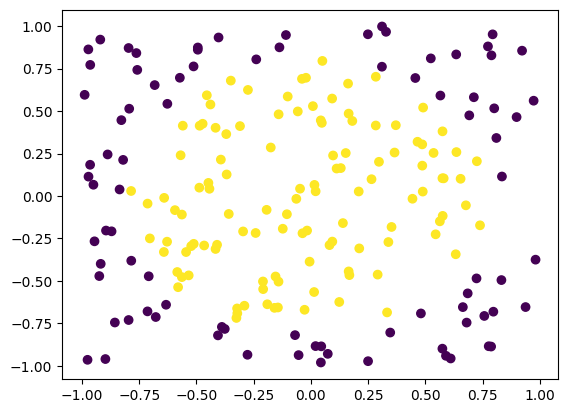

In [ ]:
plt.scatter(x[:,0], x[:,1], c=y)

plt.plot()